In [532]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [533]:
df = pd.read_csv("data/train.csv")

In [534]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [536]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [537]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [538]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [539]:
X = df.drop(columns=["Transported"])
y = df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.join(y_train)

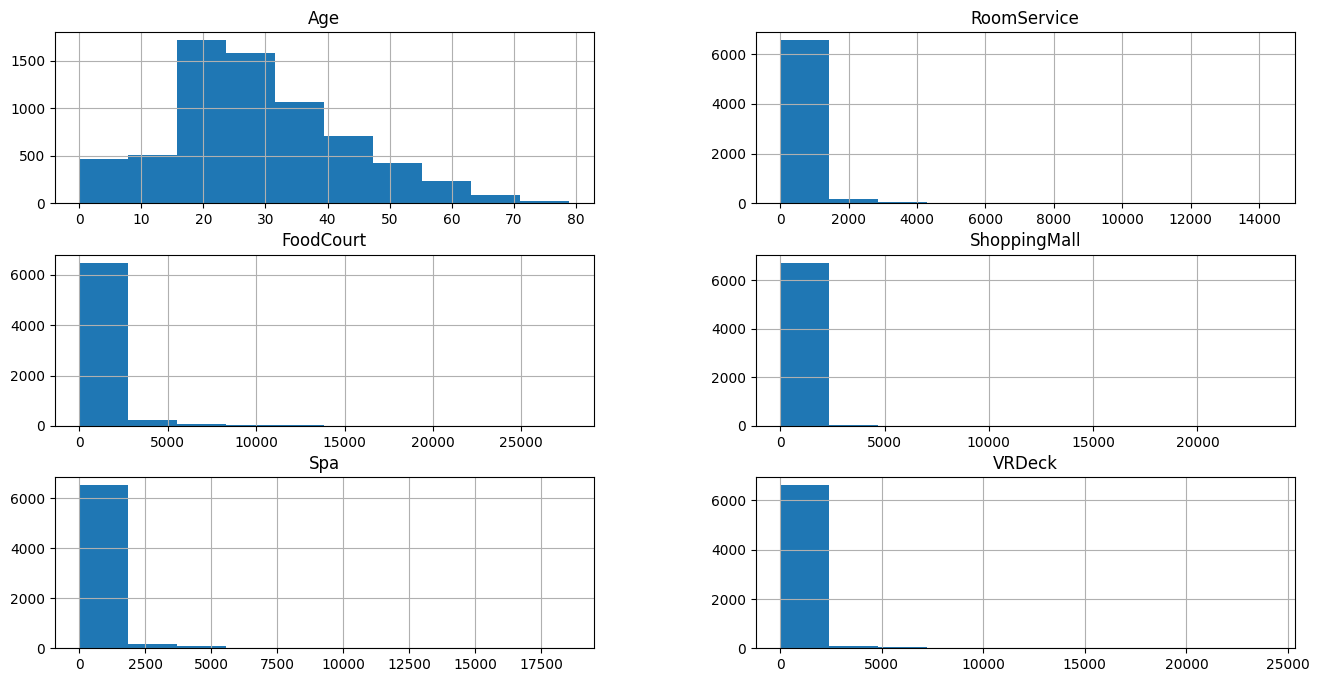

In [540]:
train_data.hist(figsize=(16, 8))
plt.show()

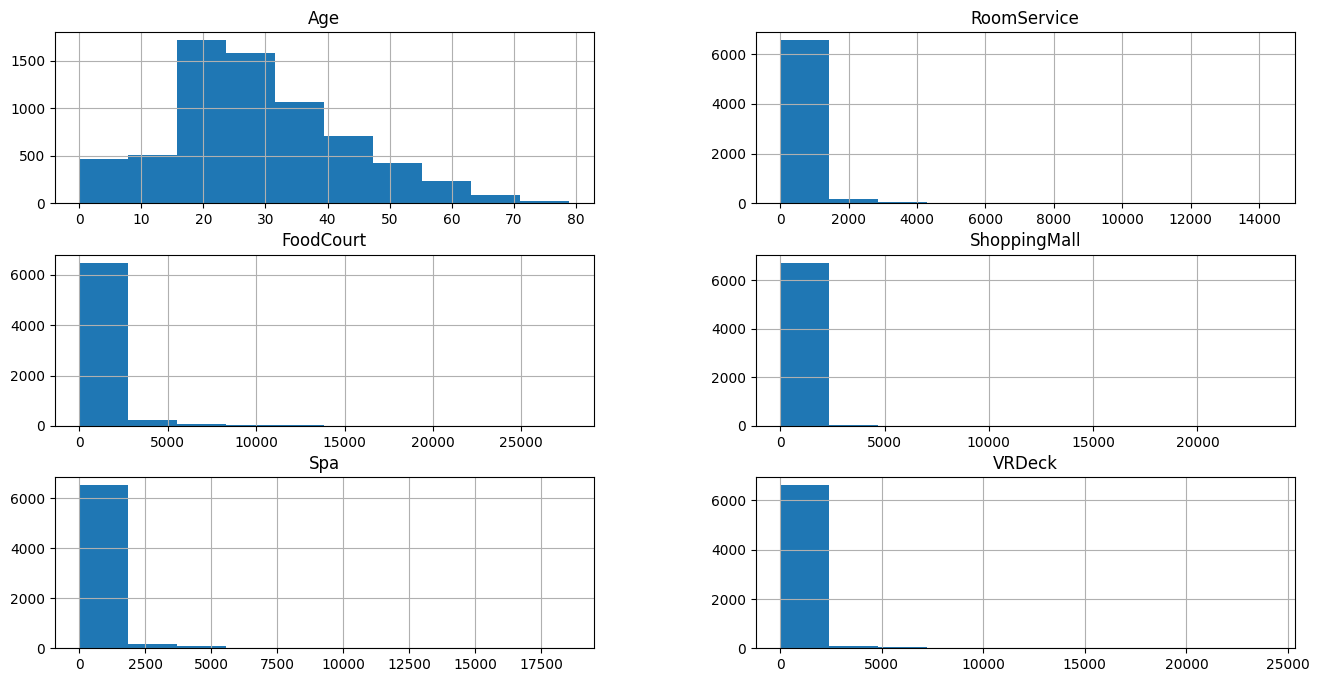

In [541]:
def scale_logarithmic(data, categories):
    for categorie in categories:
        data[categorie] = np.log(data[categorie] + 1)

#scale_logarithmic(X_train, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])
#scale_logarithmic(X_test, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])
train_data = X_train.join(y_train)
train_data.hist(figsize=(16, 8))
plt.show()

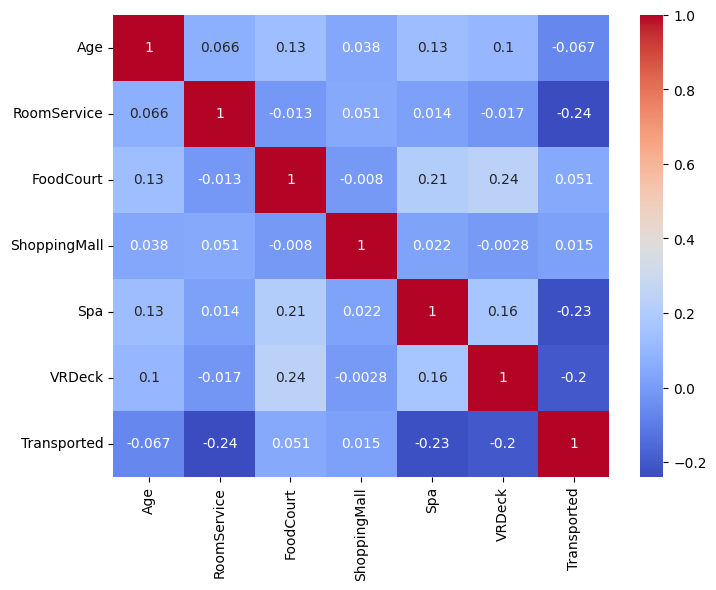

In [542]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [543]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [544]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [545]:
class FeatureImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X
        for feature in X_transformed.columns:
            if X_transformed[feature].dtype == "float64":
                imputer = SimpleImputer(strategy="mean")
                X_transformed[feature] = imputer.fit_transform(X_transformed[[feature]]).flatten()
            elif X_transformed[feature].dtype not in ["float64", "bool"]:
                imputer = SimpleImputer(strategy="most_frequent")
                X_transformed[feature] = imputer.fit_transform(X_transformed[[feature]]).flatten()
        return X_transformed


In [546]:
class FeatureSplitter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X
        columns = ["Cabin_deck", "Cabin_num", "Cabin_side"]
        df[columns] = df["Cabin"].str.split("/", expand=True)
        df = df.drop(columns=["Cabin"])
        return df

In [547]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = X
        for col in ["HomePlanet", "Destination"]:
            transformed_X = self.concat_encoded(transformed_X, col)
            transformed_X = transformed_X.drop(columns=[col])
        for col in ["Cabin_deck", "Cabin_side"]:
             encoder = LabelEncoder()
             transformed_X[col] = encoder.fit_transform(X[[col]])
        return transformed_X 

    def concat_encoded(self, X, column):
            encoder = OneHotEncoder()
            encoded = encoder.fit_transform(X[[column]])
            tmp_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
            tmp_df.index = X.index
            X = pd.concat([X, tmp_df], axis=1)
            return X

In [548]:
class FeatureBool(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X
        for column in ["CryoSleep", "Cabin_num"]:
            X_transformed[column] = X_transformed[column].astype(int)
        return X_transformed    

In [549]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=["PassengerId", "Name", "Age"])

In [550]:
class ReduceDimensions(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X
        numerical_data = df.select_dtypes(include=['float64', 'int64']) # Select only numerical columns
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numerical_data)

        # Step 2: Apply PCA
        components = 10
        pca = PCA(n_components=components)  # Specify the number of principal components you want to keep
        principal_components = pca.fit_transform(scaled_data)

        # Create a new DataFrame containing the principal components
        principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(components)])

        return principal_df

In [551]:
pipeline = Pipeline([("featureImputer", FeatureImputer()),
                     ("featureSplitter",FeatureSplitter()),
                     ("featureEncoder", FeatureEncoder()),
                     ("featureBool", FeatureBool()),
                     ("featureDropper", FeatureDropper())])
                     #("reduceDimensions", ReduceDimensions())])

In [552]:
X_train_p = pipeline.fit_transform(X_train)

/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [553]:
train_data = X_train_p.join(y_train)

In [554]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6954 non-null   int64  
 1   VIP                        6954 non-null   object 
 2   RoomService                6954 non-null   float64
 3   FoodCourt                  6954 non-null   float64
 4   ShoppingMall               6954 non-null   float64
 5   Spa                        6954 non-null   float64
 6   VRDeck                     6954 non-null   float64
 7   Cabin_deck                 6954 non-null   int64  
 8   Cabin_num                  6954 non-null   int64  
 9   Cabin_side                 6954 non-null   int64  
 10  HomePlanet_Earth           6954 non-null   float64
 11  HomePlanet_Europa          6954 non-null   float64
 12  HomePlanet_Mars            6954 non-null   float64
 13  Destination_55 Cancri e    6954 non-null   float64

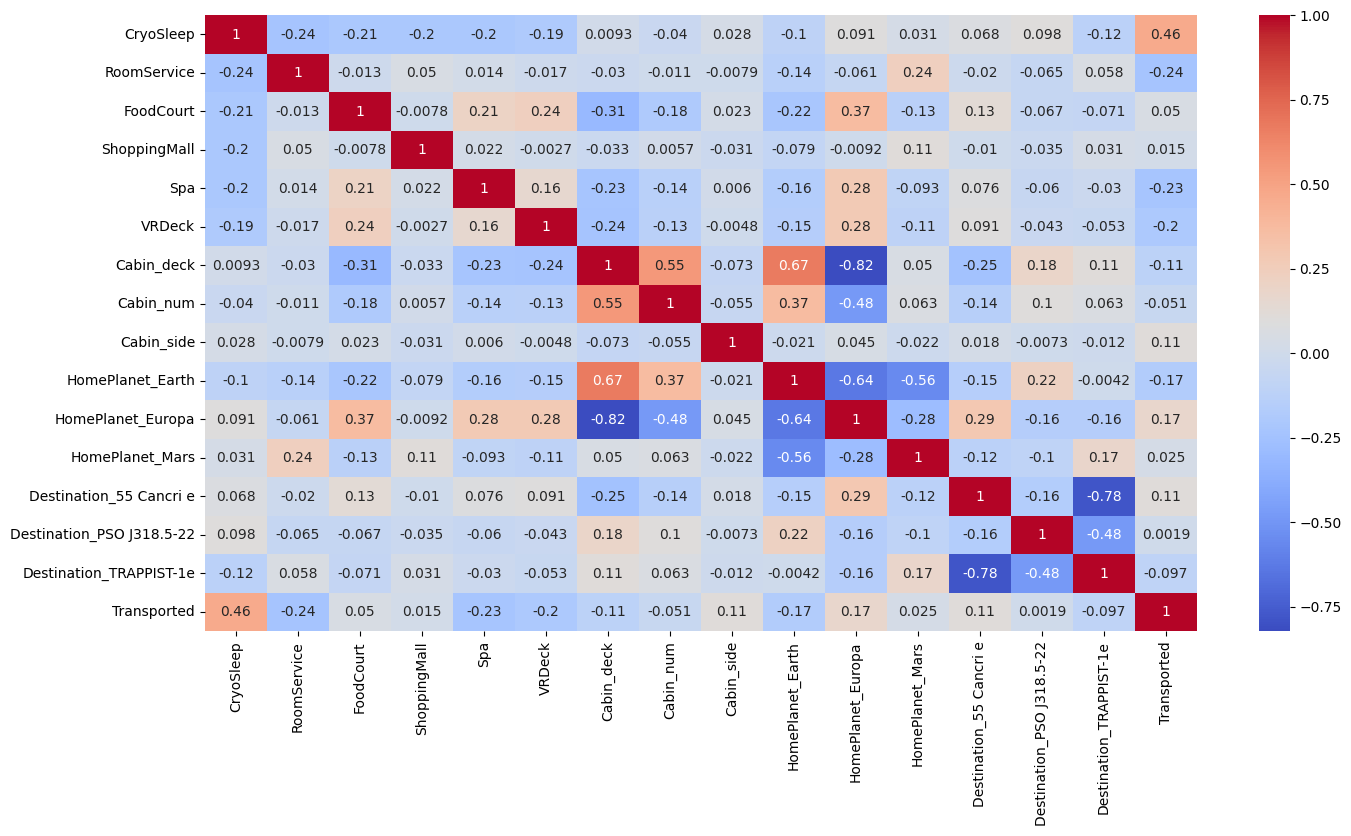

In [555]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [556]:
forest_clf = RandomForestClassifier()

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train_p)

forest_clf.fit(X_train_s, y_train)



RandomForestClassifier()

In [557]:
X_test_p = pipeline.fit_transform(X_test)
X_test_s = scaler.fit_transform(X_test_p)

forest_clf.score(X_test_s, y_test)

/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7826336975273146

In [558]:
forest_clf.score(X_train_s, y_train)

0.9920908829450676

In [559]:
forest_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'max_depth': [None, 2, 5],
    'min_samples_split': [5, 10, 12, 15]
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True, error_score="raise")
grid_search.fit(X_train_s, y_train)
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 15, 'n_estimators': 75}

In [560]:
final_clf = grid_search.best_estimator_

In [561]:
final_clf.score(X_train_s, y_train)

0.8968938740293356

In [562]:
final_clf.score(X_test_s, y_test)

0.7878090856814262

In [563]:
scaler = StandardScaler()

X_final = df.drop(columns=["Transported"])
y_final = df["Transported"]

X_final = pipeline.fit_transform(X_final)

X_final = scaler.fit_transform(X_final)
y_final = np.array(y_final)

/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [564]:
forest_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'max_depth': [None, 2, 5],
    'min_samples_split': [5, 10, 12, 15]
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True, error_score="raise")
grid_search.fit(X_final, y_final)
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}

In [565]:
prod_clf = grid_search.best_estimator_

In [566]:
test_df = pd.read_csv("data/test.csv")

In [567]:
X_final_test = test_df
X_final_test = pipeline.fit_transform(X_final_test)

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [568]:
predictions = prod_clf.predict(X_data_final_test)

In [569]:
final_df = pd.DataFrame(test_df["PassengerId"])
final_df["Transported"] = predictions
final_df.to_csv("data/predictions.csv", index=False)